# Прогнозирование успеваемости учеников

# Задание 1. Демонстрационный пример.

In [1]:
import pandas as pd # для работы с данными
from sklearn.model_selection import train_test_split # для разделения данных на обучающую и тестовую выборки
from sklearn.preprocessing import StandardScaler, OneHotEncoder # для предобработки данных
from sklearn.compose import ColumnTransformer # для преобразований столбцов
from sklearn.pipeline import Pipeline # для создания пайплайна обработки данных
from sklearn.linear_model import LinearRegression # для создания модели линейной регрессии
from sklearn.metrics import mean_squared_error, r2_score # для оценки качества модели

In [17]:
data = pd.read_csv('/content/Оценки.csv')

X = data.drop(['ид', 'итоговая_оценка'], axis=1)
y = data['итоговая_оценка']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_features = ['возраст', 'время_учебы', 'пропуски', 'предыдущая_оценка']
categorical_features = ['пол', 'образование_родителей', 'внеклассные_занятия', 'доступ_к_интернету']


preprocessor = ColumnTransformer(
    transformers=[
    ('num', StandardScaler(), numeric_features), # стандартизируем данные (среднее = 0, стандартное отклонение = 1)
    ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features) # преобразовываем категориальные переменные к бинарным признакам
    ]
)

model = Pipeline([
  ('preprocessor', preprocessor), # готовим данные
  ('regressor', LinearRegression()) # обучение линейной регрессии
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Среднеквадратическая ошибка: {mse:.2f}")
print(f"Коэффициент детерминации R^2: {r2:.2f}")

Среднеквадратическая ошибка: 0.43
Коэффициент детерминации R^2: 0.99


In [19]:
def get_user_input():
  print("\nПожалуйста, введите ваши данные:")
  age = int(input("Возраст: "))
  gender = input("Пол (мужской/женский): ")
  parent_education = input("Образование родителей (высшее/среднее): ")
  study_time = int(input("Время учебы (часов в день): "))
  extracurricular = input("Внеклассные занятия (да/нет): ")
  internet_access = input("Доступ к интернету (да/нет): ")
  absences = int(input("Количество пропусков: "))
  previous_grade = float(input("Предыдущая оценка: "))
  return {
    'возраст': age,
    'пол': gender,
    'образование_родителей': parent_education,
    'время_учебы': study_time,
    'внеклассные_занятия': extracurricular,
    'доступ_к_интернету': internet_access,
    'пропуски': absences,
    'предыдущая_оценка': previous_grade
    }

def predict_student_grade(student_data):
  student_df = pd.DataFrame([student_data])
  prediction = model.predict(student_df)
  return prediction[0]

while True:
  student_data = get_user_input()
  predicted_grade = predict_student_grade(student_data)
  print(f"\nПрогноз итоговой оценки: {predicted_grade:.2f}")
  continue_prediction = input("\nХотите сделать еще один прогноз? (да/нет): ")
  if continue_prediction.lower() != 'да':
    break
    print("Спасибо за использование программы!")


Пожалуйста, введите ваши данные:
Возраст: 14
Пол (мужской/женский): женский
Образование родителей (высшее/среднее): высшее
Время учебы (часов в день): 6
Внеклассные занятия (да/нет): нет
Доступ к интернету (да/нет): да
Количество пропусков: 4
Предыдущая оценка: 82

Прогноз итоговой оценки: 85.74

Хотите сделать еще один прогноз? (да/нет): нет


# Задание 2. Самостоятельный пример.

In [12]:
import pandas as pd # для работы с данными
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # для разделения данных на обучающую и тестовую выборки
from sklearn.preprocessing import StandardScaler, OneHotEncoder # для предобработки данных
from sklearn.compose import ColumnTransformer # для преобразований столбцов
from sklearn.pipeline import Pipeline # для создания пайплайна обработки данных
from sklearn.linear_model import LinearRegression # для создания модели линейной регрессии
from sklearn.metrics import mean_squared_error, r2_score # для оценки качества модели

Среднеквадратическая ошибка: 14.15
Коэффициент детерминации R^2: 0.64


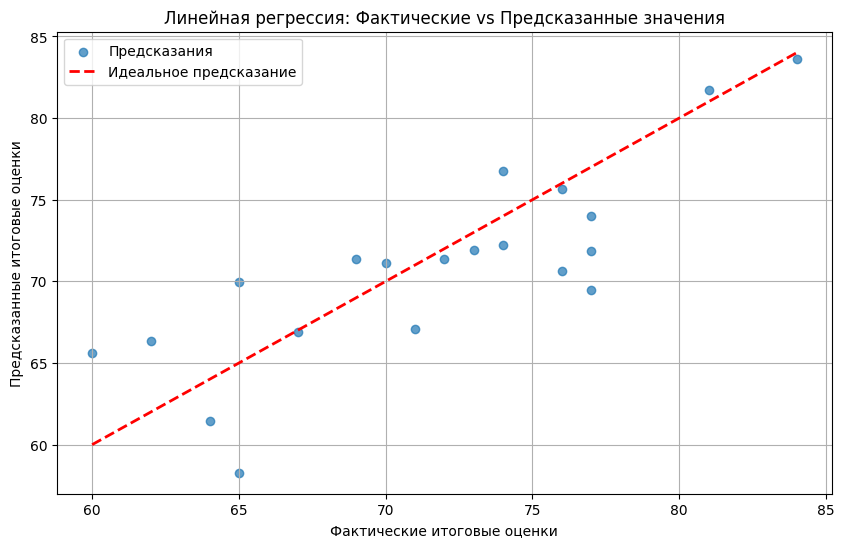

In [22]:
data = pd.read_csv('/content/Оценки2.csv')

X = data.drop(['ид', 'итоговая_оценка'], axis=1)
y = data['итоговая_оценка']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_features = ['возраст', 'время_учебы', 'пропуски', 'предыдущая_оценка', 'друзья_в_организации']
categorical_features = ['пол', 'образование_родителей', 'внеклассные_занятия', 'доступ_к_интернету', 'стипендия']


preprocessor = ColumnTransformer(
    transformers=[
    ('num', StandardScaler(), numeric_features), # стандартизируем данные (среднее = 0, стандартное отклонение = 1)
    ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features) # преобразовываем категориальные переменные к бинарным признакам
    ]
)

model = Pipeline([
  ('preprocessor', preprocessor), # готовим данные
  ('regressor', LinearRegression()) # обучение линейной регрессии
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Среднеквадратическая ошибка: {mse:.2f}")
print(f"Коэффициент детерминации R^2: {r2:.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, label='Предсказания')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Идеальное предсказание')
plt.xlabel('Фактические итоговые оценки')
plt.ylabel('Предсказанные итоговые оценки')
plt.title('Линейная регрессия: Фактические vs Предсказанные значения')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
def get_user_input():
  print("\nПожалуйста, введите ваши данные:")
  age = int(input("Возраст: "))
  gender = input("Пол (мужской/женский): ")
  parent_education = input("Образование родителей (высшее/среднее): ")
  study_time = int(input("Время учебы (часов в день): "))
  extracurricular = input("Внеклассные занятия (да/нет): ")
  internet_access = input("Доступ к интернету (да/нет): ")
  absences = int(input("Количество пропусков: "))
  stipend = input("Есть ли стипендия? (да/нет): ")
  friends_in_org = input("Кол-во друзей в организации: ")
  previous_grade = float(input("Предыдущая оценка: "))
  return {
    'возраст': age,
    'пол': gender,
    'образование_родителей': parent_education,
    'время_учебы': study_time,
    'внеклассные_занятия': extracurricular,
    'доступ_к_интернету': internet_access,
    'пропуски': absences,
    'стипендия': stipend,
    'друзья_в_организации': friends_in_org,
    'предыдущая_оценка': previous_grade
    }

def predict_student_grade(student_data):
  student_df = pd.DataFrame([student_data])
  prediction = model.predict(student_df)
  return prediction[0]

while True:
  student_data = get_user_input()
  predicted_grade = predict_student_grade(student_data)
  print(f"\nПрогноз итоговой оценки: {predicted_grade:.2f}")
  continue_prediction = input("\nХотите сделать еще один прогноз? (да/нет): ")
  if continue_prediction.lower() != 'да':
    break
    print("Спасибо за использование программы!")


Пожалуйста, введите ваши данные:
Возраст: 14
Пол (мужской/женский): женский
Образование родителей (высшее/среднее): высшее
Время учебы (часов в день): 8
Внеклассные занятия (да/нет): да
Доступ к интернету (да/нет): да
Количество пропусков: 8
Есть ли стипендия? (да/нет): да
Кол-во друзей в организации: 8
Предыдущая оценка: 85

Прогноз итоговой оценки: 80.50

Хотите сделать еще один прогноз? (да/нет): нет
